In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import iqr
pd.options.display.max_rows = 50

<br>**1. Loadig the dataset**<br><br>

In [17]:
airbnb_df = pd.read_csv(r'../airbnb_raw.csv')

In [18]:
airbnb_df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [19]:
airbnb_df.to_excel("airbnb_raw data.xlsx")

In [20]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

<br>**2. Checking the dataset**<br><br>

Check for NaN: No NaN values
Check for Plausibility: Zero values in Bedrooms -> remove

In [21]:
airbnb_df.drop(airbnb_df[airbnb_df['Bedrooms'] == 0].index, inplace = True)

In [22]:
airbnb_df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


<br> **2.1. Check for & remove outliers:**<br>
- suspected correlation between indexes, in these cases no outlier removal for now <br>
Cutoff Value: Count <10% Set Size.

In [23]:
airbnb_df['Price'][airbnb_df['Price'] > 1100].count()

368

In [24]:
airbnb_df['Bedrooms'][airbnb_df['Bedrooms'] > 3].count()

86

In [25]:
airbnb_df['City Center (km)'][airbnb_df['City Center (km)'] > 15].count()

72

In [26]:
airbnb_df['Metro Distance (km)'][airbnb_df['Metro Distance (km)'] > 4].count()

305

In [27]:
airbnb_df_1 = airbnb_df

In [28]:
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['Price'] > 1100].index, inplace = True)
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['Bedrooms'] > 3].index, inplace = True)
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['City Center (km)'] > 15].index, inplace = True)
airbnb_df_1.drop(airbnb_df_1[airbnb_df_1['Metro Distance (km)'] > 4].index, inplace = True)

<br>**2.2. Convert to float and encode bool and object**<br><br>

In [29]:
airbnb_df_2 = airbnb_df_1
airbnb_df_2 = airbnb_df_2.astype({'Multiple Rooms':'float','Business':'float','Bedrooms':'float'})

In [30]:
airbnb_df_3 = airbnb_df_2

In [31]:
airbnb_df_3 = pd.get_dummies(airbnb_df, columns = ['City','Day'], drop_first = True)

In [32]:
enc = OrdinalEncoder(categories=[['Shared room','Private room', 'Entire home/apt']])
airbnb_df_3['Room Type'] = enc.fit_transform(airbnb_df_3[['Room Type']]).reshape((1,-1))[0]

In [33]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1'
    elif v == 'False':
        return '0'
    else:
        return v

In [34]:
airbnb_df_3['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Shared Room']).astype(float)
airbnb_df_3['Private Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Private Room']).astype(float)
airbnb_df_3['Superhost'] = np.vectorize(boolstr_to_floatstr)(airbnb_df_3['Superhost']).astype(float)

In [35]:
airbnb_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37197 entries, 0 to 41713
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        37197 non-null  float64
 1   Room Type                    37197 non-null  float64
 2   Shared Room                  37197 non-null  float64
 3   Private Room                 37197 non-null  float64
 4   Person Capacity              37197 non-null  float64
 5   Superhost                    37197 non-null  float64
 6   Multiple Rooms               37197 non-null  int64  
 7   Business                     37197 non-null  int64  
 8   Cleanliness Rating           37197 non-null  float64
 9   Guest Satisfaction           37197 non-null  float64
 10  Bedrooms                     37197 non-null  int64  
 11  City Center (km)             37197 non-null  float64
 12  Metro Distance (km)          37197 non-null  float64
 13  Attraction Index

<br>**2.3. Remove correlated variables**<br><br>

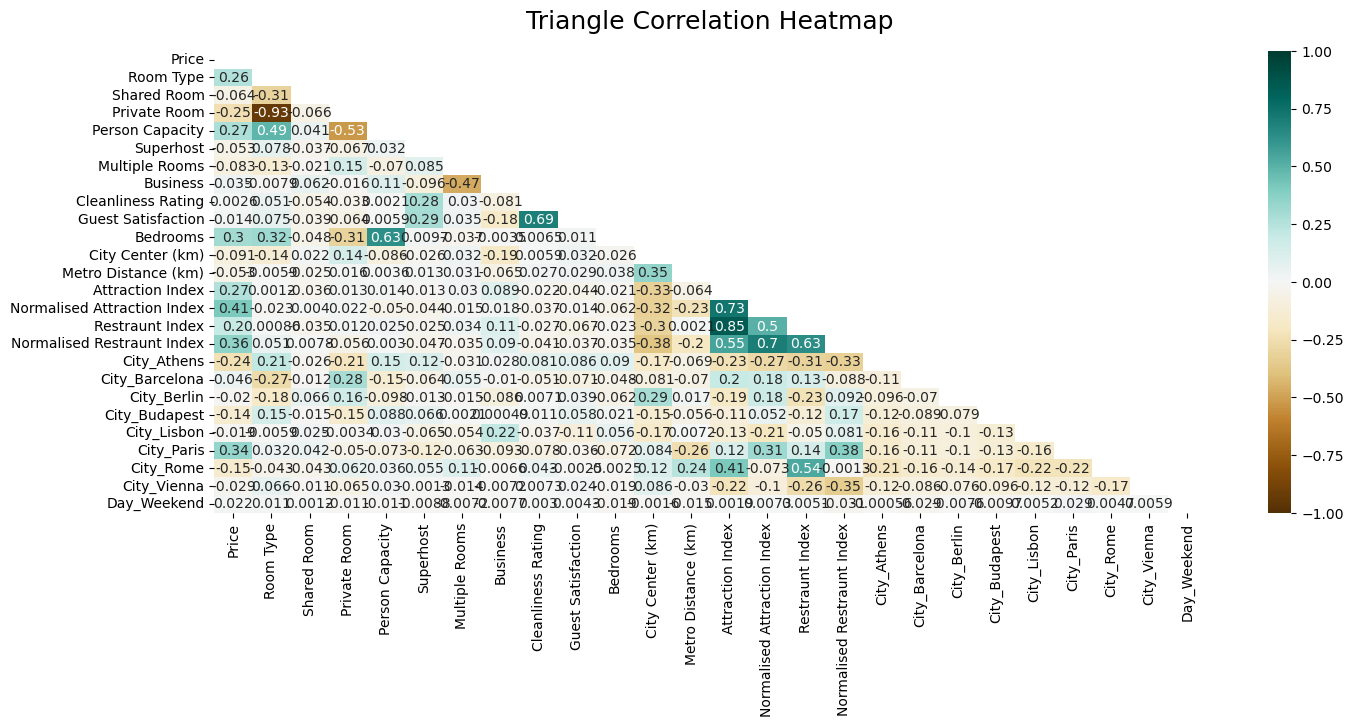

In [36]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df_3.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df_3.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [37]:
airbnb_df_4 = airbnb_df_3.drop(columns=['Attraction Index', 'Restraunt Index', 'Shared Room', 'Private Room','Guest Satisfaction','Person Capacity','Normalised Restraunt Index'])

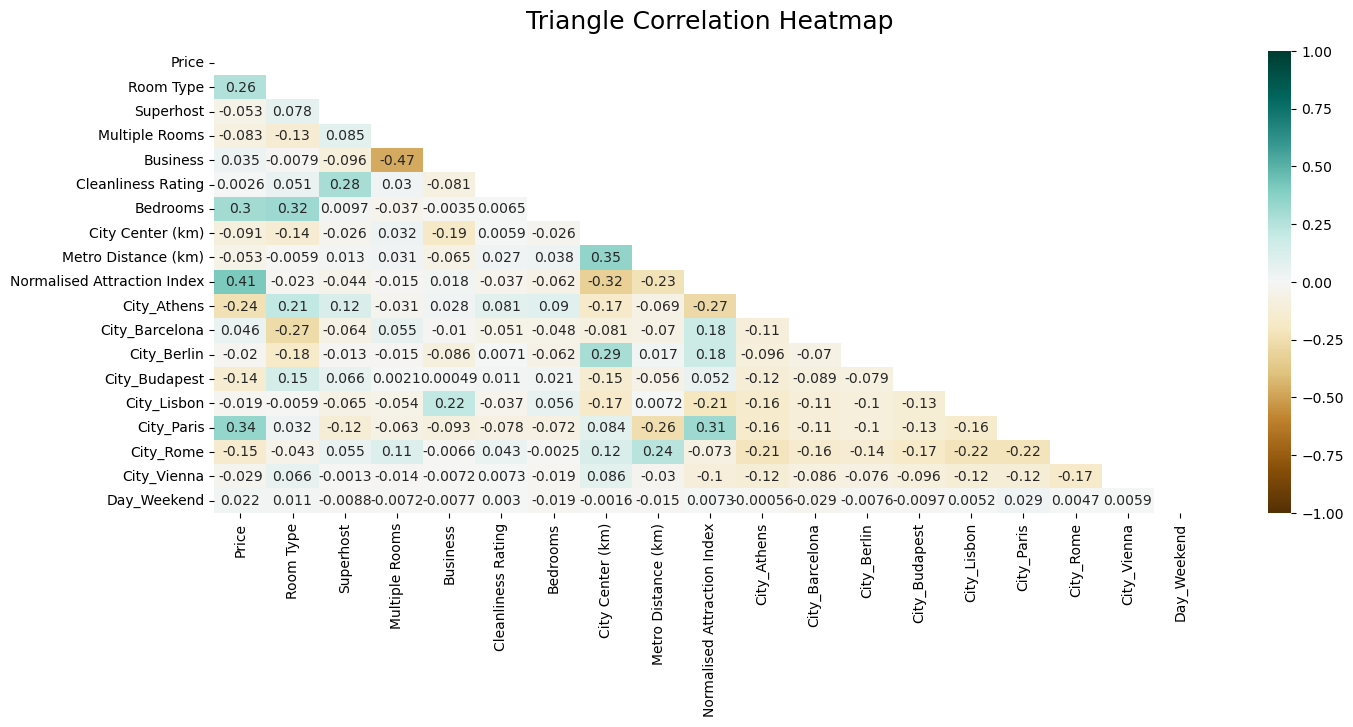

In [38]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df_4.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df_4.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

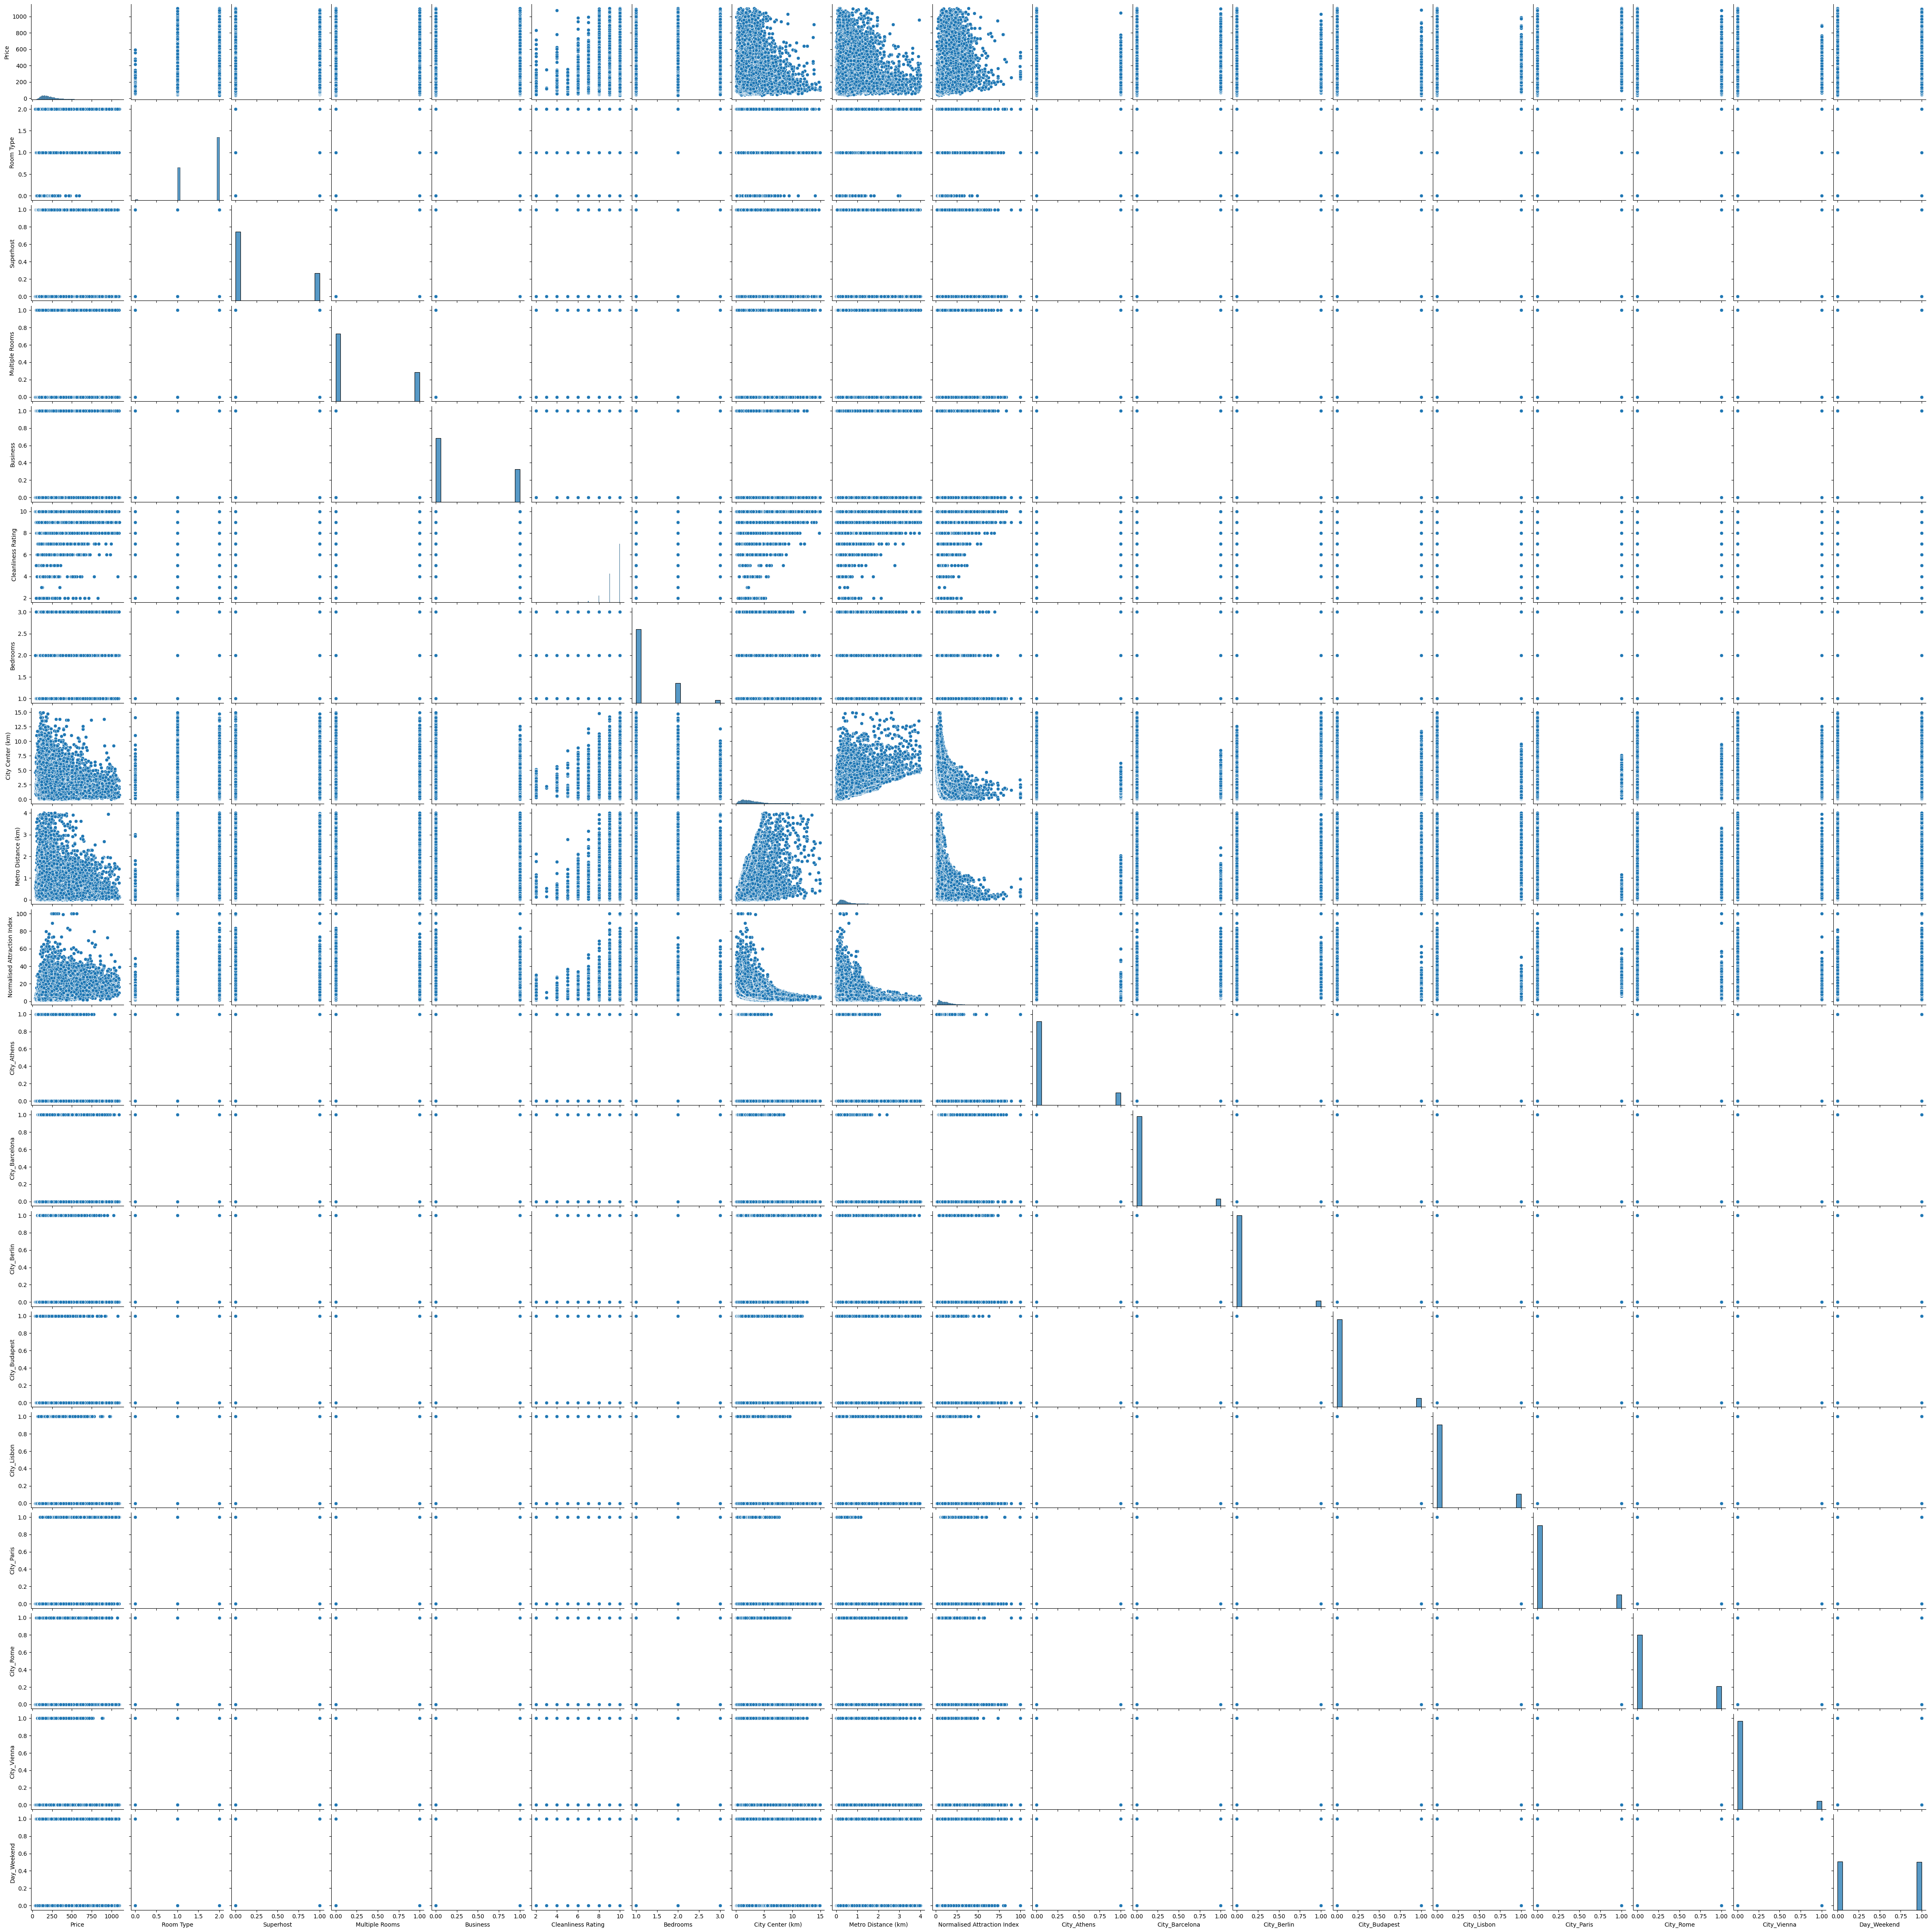

In [39]:
sns.pairplot(airbnb_df_4.select_dtypes(np.number))

In [24]:
airbnb_df_4['Normalised Attraction Index'][airbnb_df_4['Normalised Attraction Index'] > 40].count()

301

In [25]:
airbnb_df_4.drop(airbnb_df_4[airbnb_df_4['Normalised Attraction Index'] >40].index, inplace = True)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Room Type'}>,
        <AxesSubplot:title={'center':'Superhost'}>,
        <AxesSubplot:title={'center':'Multiple Rooms'}>],
       [<AxesSubplot:title={'center':'Business'}>,
        <AxesSubplot:title={'center':'Cleanliness Rating'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'City Center (km)'}>],
       [<AxesSubplot:title={'center':'Metro Distance (km)'}>,
        <AxesSubplot:title={'center':'Normalised Attraction Index'}>,
        <AxesSubplot:title={'center':'City_Athens'}>,
        <AxesSubplot:title={'center':'City_Barcelona'}>],
       [<AxesSubplot:title={'center':'City_Berlin'}>,
        <AxesSubplot:title={'center':'City_Budapest'}>,
        <AxesSubplot:title={'center':'City_Lisbon'}>,
        <AxesSubplot:title={'center':'City_Paris'}>],
       [<AxesSubplot:title={'center':'City_Rome'}>,
        <AxesSubplot:title={'center':'City_Vienna'}>,

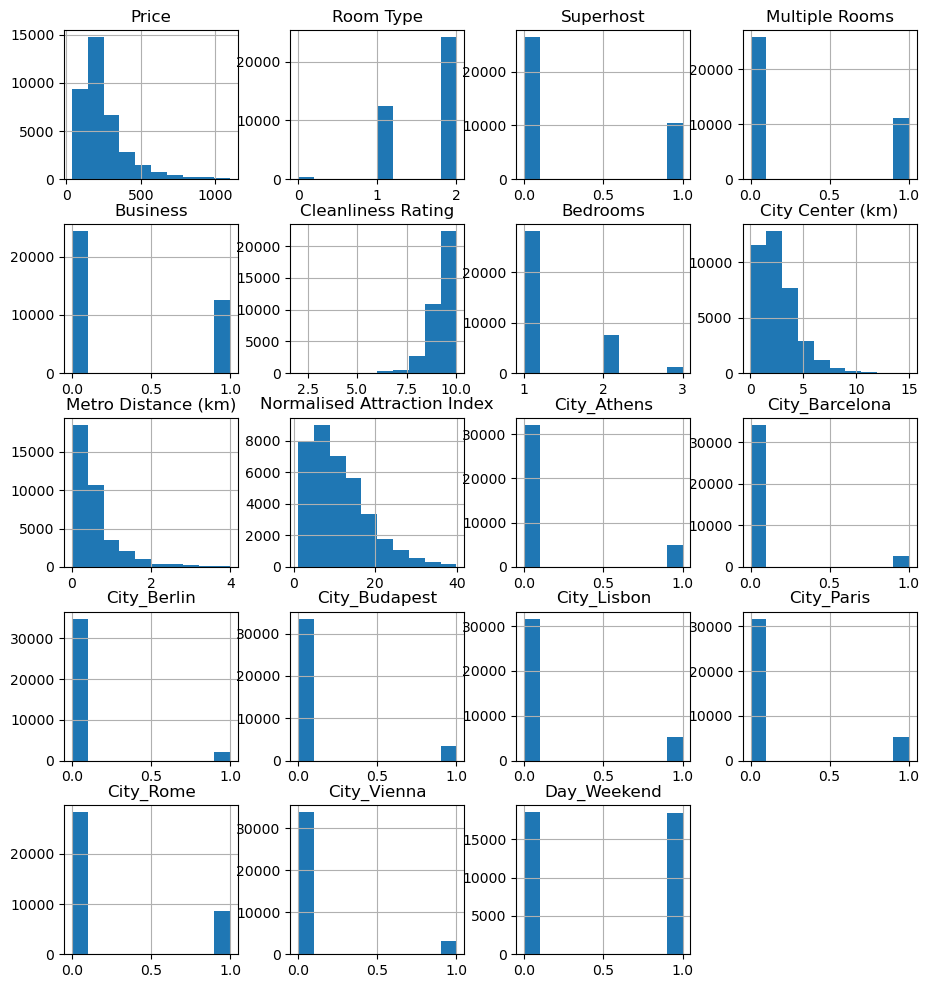

In [26]:
airbnb_df_4.hist(figsize=(11,12))

<AxesSubplot:xlabel='Price', ylabel='Count'>

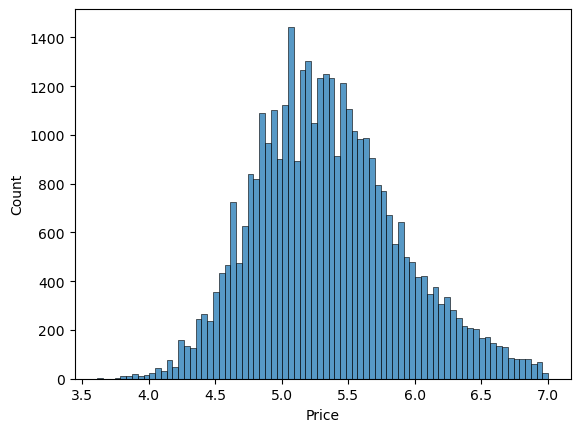

In [40]:
sns.histplot(np.log(airbnb_df_4['Price']))

<AxesSubplot:xlabel='Cleanliness Rating', ylabel='Count'>

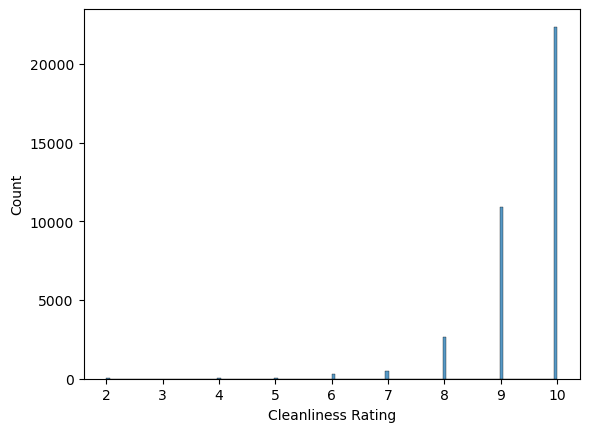

In [28]:
sns.histplot(airbnb_df_4['Cleanliness Rating'])

In [46]:
airbnb_df_4.to_excel("airbnb_clean data.xlsx")

<br>**3. OLS Modeling**<br><br>

**3.1. First Iteration**

In [38]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [39]:
X = airbnb_df_4.drop('Price', axis=1)
y = airbnb_df_4.Price

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Superhost,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend
1766,1.0,0.0,0,1,10.0,1,0.899709,0.801882,23.344710,0,0,0,0,0,0,0,0,1
622,1.0,0.0,0,0,9.0,1,2.221383,1.701819,10.733560,0,0,0,0,0,0,0,0,0
5358,2.0,0.0,1,0,8.0,1,0.681085,0.588844,5.216535,1,0,0,0,0,0,0,0,1
2713,2.0,0.0,1,0,10.0,1,2.088761,0.704363,4.664020,1,0,0,0,0,0,0,0,0
21032,2.0,0.0,1,0,10.0,2,1.004913,0.787286,6.613522,0,0,0,0,1,0,0,0,1


In [41]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     1993.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:05:42   Log-Likelihood:            -1.5578e+05
No. Observations:               25827   AIC:                         3.116e+05
Df Residuals:                   25808   BIC:                         3.117e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<br>**3.2. Second Iteration**
- removing "City Center", "Metro Distance" and "Superhost"<br>

In [42]:
airbnb_df_5 = airbnb_df_4.drop(columns=['Superhost', 'City Center (km)','Metro Distance (km)'])

In [47]:
airbnb_df_5.to_excel("airbnb_significant data.xlsx")

In [44]:
X = airbnb_df_5.drop('Price', axis=1)
y = airbnb_df_5.Price

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend
1766,1.0,0,1,10.0,1,23.344710,0,0,0,0,0,0,0,0,1
622,1.0,0,0,9.0,1,10.733560,0,0,0,0,0,0,0,0,0
5358,2.0,1,0,8.0,1,5.216535,1,0,0,0,0,0,0,0,1
2713,2.0,1,0,10.0,1,4.664020,1,0,0,0,0,0,0,0,0
21032,2.0,1,0,10.0,2,6.613522,0,0,0,0,1,0,0,0,1


In [90]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2391.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:48:17   Log-Likelihood:            -1.5578e+05
No. Observations:               25827   AIC:                         3.116e+05
Df Residuals:                   25811   BIC:                         3.117e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<br>**3.3. Third Iteration**<br>
- log Price<br>

In [93]:
X = airbnb_df_5.drop('Price', axis=1)
y = np.log(airbnb_df_5.Price)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend
1766,1.0,0,1,10.0,1,23.344710,0,0,0,0,0,0,0,0,1
622,1.0,0,0,9.0,1,10.733560,0,0,0,0,0,0,0,0,0
5358,2.0,1,0,8.0,1,5.216535,1,0,0,0,0,0,0,0,1
2713,2.0,1,0,10.0,1,4.664020,1,0,0,0,0,0,0,0,0
21032,2.0,1,0,10.0,2,6.613522,0,0,0,0,1,0,0,0,1


In [95]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3264.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:50:36   Log-Likelihood:                -7178.1
No. Observations:               25827   AIC:                         1.439e+04
Df Residuals:                   25811   BIC:                         1.452e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<br>**3.4.1 Fourth Iteration**<br>
- standard scaler<br>
- log "Price"<br><br>

In [96]:
airbnb_df_6 = airbnb_df_5

In [99]:
X = airbnb_df_6.drop('Price', axis=1)
y = np.log(airbnb_df_6.Price)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend
1766,1.0,0,1,10.0,1,23.344710,0,0,0,0,0,0,0,0,1
622,1.0,0,0,9.0,1,10.733560,0,0,0,0,0,0,0,0,0
5358,2.0,1,0,8.0,1,5.216535,1,0,0,0,0,0,0,0,1
2713,2.0,1,0,10.0,1,4.664020,1,0,0,0,0,0,0,0,0
21032,2.0,1,0,10.0,2,6.613522,0,0,0,0,1,0,0,0,1


In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3264.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:53:28   Log-Likelihood:                -7178.1
No. Observations:               25827   AIC:                         1.439e+04
Df Residuals:                   25811   BIC:                         1.452e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3488      0.002   2689.616      0.0

<br>**4.4.2. Iteration (Alternative)**<br>
- power transformer<br>
- log "Price"<br><br>

In [103]:
airbnb_df_7 = airbnb_df_5

In [106]:
X = airbnb_df_7.drop('Price', axis=1)
y = np.log(airbnb_df_7.Price)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,Room Type,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,Normalised Attraction Index,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend
1766,1.0,0,1,10.0,1,23.344710,0,0,0,0,0,0,0,0,1
622,1.0,0,0,9.0,1,10.733560,0,0,0,0,0,0,0,0,0
5358,2.0,1,0,8.0,1,5.216535,1,0,0,0,0,0,0,0,1
2713,2.0,1,0,10.0,1,4.664020,1,0,0,0,0,0,0,0,0
21032,2.0,1,0,10.0,2,6.613522,0,0,0,0,1,0,0,0,1


In [108]:
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [138]:
X_train_const_pt = sm.add_constant(X_train_pt) # adding a constant

model = sm.OLS(y_train, X_train_const_pt).fit()
predictions_train = model.predict(X_train_const_pt)

X_test_const_pt = sm.add_constant(X_test_pt) # adding a constant
predictions_test = model.predict(X_test_const_pt)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     3307.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:39:17   Log-Likelihood:                -7066.2
No. Observations:               25827   AIC:                         1.416e+04
Df Residuals:                   25811   BIC:                         1.429e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3488      0.002   2701.289      0.0

In Scikit Learn:

In [172]:
from sklearn.linear_model import LinearRegression
data = airbnb_df_7
x = airbnb_df_7.drop('Price', axis=1)
y = np.log(airbnb_df_7.Price)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = TT_RATIO,random_state = RAND_STATE) 
lm = LinearRegression()
lm = lm.fit(x_train,y_train)

In [173]:
lm.coef_

array([ 0.4054304 ,  0.05724284,  0.15250524,  0.04543594,  0.26129858,
        0.02339265, -1.27082892, -0.58416452, -0.73525021, -1.20372483,
       -0.72085352, -0.43639382, -0.89916622, -0.75865696,  0.02524693])

In [174]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)

                              0         0
0                     Room Type  0.405430
1                Multiple Rooms  0.057243
2                      Business  0.152505
3            Cleanliness Rating  0.045436
4                      Bedrooms  0.261299
5   Normalised Attraction Index  0.023393
6                   City_Athens -1.270829
7                City_Barcelona -0.584165
8                   City_Berlin -0.735250
9                 City_Budapest -1.203725
10                  City_Lisbon -0.720854
11                   City_Paris -0.436394
12                    City_Rome -0.899166
13                  City_Vienna -0.758657
14                  Day_Weekend  0.025247


In [175]:
lm.intercept_

4.37660470158356

<br>**5. OLS Validation**<br><br>

In [176]:
y_pred = lm.predict(x_test)

In [177]:
y_error = y_test - y_pred

In [178]:
r2_score(y_test,y_pred)

0.6634577055638167

<AxesSubplot:ylabel='Price'>

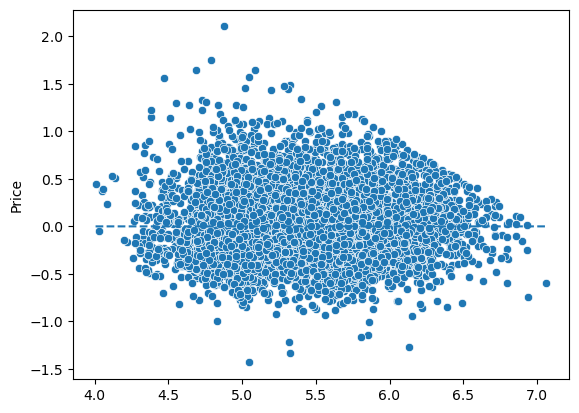

In [ ]:
sns.scatterplot(x=y_pred, y=y_error)
sns.lineplot(x=y_pred, y=np.zeros(len(y_pred)), linestyle='dashed')